Final weight: 0.662
Final confidence: 0.816
Weight stability (last 100 steps std): 0.04715
The synapse remains plastic - uncertainty persists.


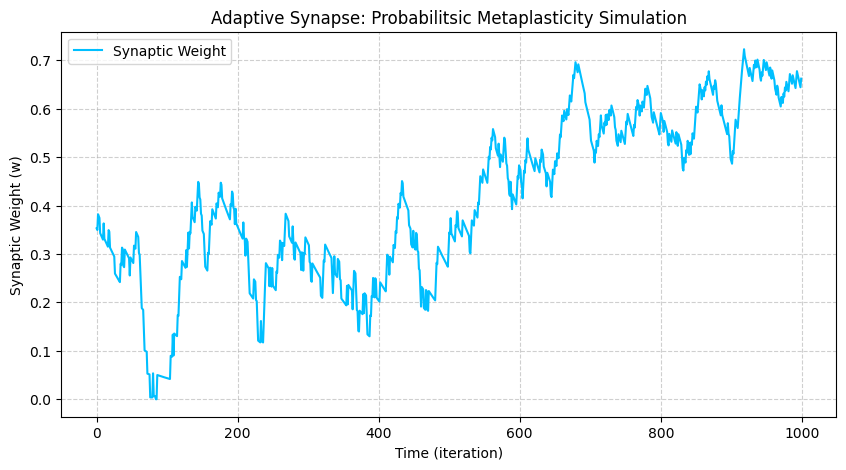

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#______________________________
#  Adaptive Synapse Simulation
#______________________________


#Parameters
timesteps = 1000              #Number of input events
learning_rate = 0.05          #How fast the synapse learn
forgetting_rate = 0.01        #How fast it decays
confidence_growth = 0.001     #How confidence increases over time


#Initialization
w = np.random.rand() * 0.5    #Store weight over time
confidence =  0.5             #Initial probability of "trusting" updates
weights = []                  #Store weight over time


# Input signal stream (1 = spike, 0 = no spike)
# A semi-random pattern with structured noise

spikes = np.random.choice([0, 1], size=timesteps, p = [0.6, 0.4])

for t in range (timesteps): 
    spike = spikes[t]

    # If a spike occurs, adapt based on probabilistic update
    if spike: 
        # Random direction weighted by confidence
        direction = np.random.choice([1,-1], p = [confidence, 1 - confidence])
        delta = learning_rate * (1 - w) * direction
        w += delta
    else:
        # No spike -> gradual forgetting
        w -= forgetting_rate  * w

    # Keep weight bounded between 0 and 1
    w = np.clip(w, 0, 1) 

    # Confidence grows slowly (like experience consolidation)
    confidence = np.clip(confidence + confidence_growth * (1 - confidence), 0, 1)
    
    weights.append(w)

#______________________________
#  Visualization
#______________________________

plt.figure(figsize = (10,5))
plt.plot(weights, label = 'Synaptic Weight', color = 'deepskyblue')
plt.title("Adaptive Synapse: Probabilitsic Metaplasticity Simulation")
plt.xlabel("Time (iteration)")
plt.ylabel("Synaptic Weight (w)")
plt.grid(True, linestyle='--', alpha = 0.6)
plt.legend()
plt.show

#______________________________
#  Reflection Output
#______________________________

stability = np.std(weights[-100:])
print(f"Final weight: {weights[-1]:.3f}")
print(f"Final confidence: {confidence:.3f}")
print(f"Weight stability (last 100 steps std): {stability:.5f}")

if stability < 0.02:
    print("The synapse stabalized - it learned to trust its environment.")
else:
    print("The synapse remains plastic - uncertainty persists.")

